<a href="https://colab.research.google.com/github/m4gnel/ASIET/blob/main/S5_AI/ML/LAB/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [18]:
try:
  bdf = pd.read_csv('boston.csv')
except FileNotFoundError:
  print('File not found ! Ensure the dataset is in the correct directory.')

In [19]:
print("\t\t\t\tDataset Head")
print("------------------------------------------------------------------------------")
print (bdf.head())
print("\n\n\t\t\t\tDataset Info")
print("------------------------------------------------------------------------------")
bdf.info()

				Dataset Head
------------------------------------------------------------------------------
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


				Dataset Info
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  --

In [28]:

X = bdf['RM'].values.reshape(-1,1) # RM feature (rooms per dwelling)
y = bdf['MEDV'] # Median home value ($1000s) - assuming target column is named 'MEDV'

In [29]:
# Create polynomial regression model using built-in pipeline
degree = 2  # Adjust polynomial degree here
model = make_pipeline(
    PolynomialFeatures(degree),  # Creates polynomial features
    LinearRegression()           # Fits linear regression to polynomial features
)

# Fit the model
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [30]:
# Generate predictions for smooth curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

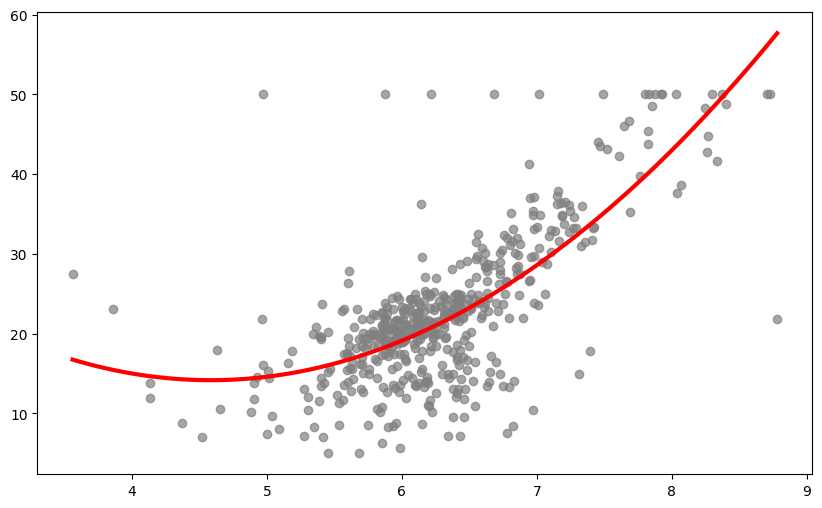

In [31]:
# Plot results (using your existing plotting style)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='grey', alpha=0.7, label='Actual Values')
plt.plot(X_range, y_pred, color='red', linewidth=3, label=f'Polynomial Regression (degree={degree})')